<a href="https://colab.research.google.com/github/SLCFLAB/Data-Science-Python/blob/main/Day%2012/12_1_traditional_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Traditional Models

In this part, you will practice implementing traditional time series analysis models with python. In finance, these approaches are often more welcomed due to their interpretability. So, please do not just ignore this part and follow the logic.

Reference:
* AR: https://vitalflux.com/autoregressive-ar-models-with-python-examples/
* MA: https://goodboychan.github.io/python/datacamp/time_series_analysis/2020/06/08/02-Moving-Average-and-ARMA-Models.html
* ARIMA: https://towardsdatascience.com/machine-learning-part-19-time-series-and-autoregressive-integrated-moving-average-model-arima-c1005347b0d7

## AR (Autogregressive Model)

In [ ]:
!pip install --upgrade statsmodels

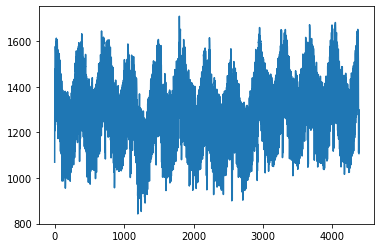

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#
# Load AutoReg class from statsmodels.tsa.ar_model module
#
from statsmodels.tsa.ar_model import AutoReg

# Load and plot the time-series data
#
url='https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
df = pd.read_csv(url,sep=",")
df['Consumption'].plot()
plt.show()

In [ ]:
# Load and plot the time-series data
#
url='https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
df = pd.read_csv(url,sep=",")

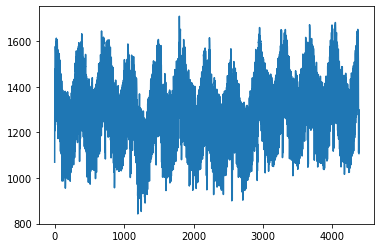

In [ ]:
df['Consumption'].plot()
plt.show()

In [ ]:
#
# Check for stationarity of the time-series data
# We will look for p-value. In case, p-value is less than 0.05, the time series
# data can said to have stationarity
#
from statsmodels.tsa.stattools import adfuller

In [ ]:
#
# Run the test
#
df_stationarityTest = adfuller(df['Consumption'], autolag='AIC')
#
# Check the value of p-value
#
print("P-value: ", df_stationarityTest[1])


P-value:  4.7440549018425884e-08


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


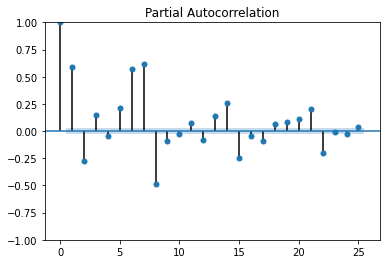

In [ ]:
# Next step is to find the order of AR model to be trained
# for this, we will plot partial autocorrelation plot to assess
# the direct effect of past data on future data
#
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(df['Consumption'], lags=25)
plt.show()

From the plot, we can conclude that lag of 8 is enough for our model.

In [ ]:
#
# Create training and test data
#
train_data = df['Consumption'][:len(df)-100]
test_data = df['Consumption'][len(df)-100:]
#
# Instantiate and fit the AR model with training data
#
ar_model = AutoReg(train_data, lags=8).fit()
#
# Print Summary
#
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:            Consumption   No. Observations:                 4283
Model:                     AutoReg(8)   Log Likelihood              -24231.812
Method:               Conditional MLE   S.D. of innovations             70.058
Date:                Mon, 02 May 2022   AIC                          48483.625
Time:                        11:55:55   BIC                          48547.230
Sample:                             8   HQIC                         48506.095
                                 4283                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            121.2792     14.444      8.397      0.000      92.969     149.589
Consumption.L1     0.6393      0.013     47.751      0.000       0.613       0.666
Consumption.L2    -0.0966      0.011

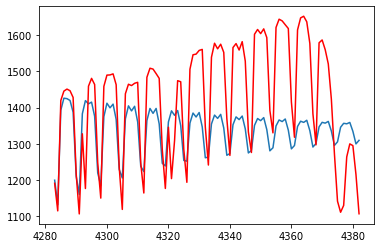

In [ ]:
#
# Make the predictions
#
pred = ar_model.predict(start=len(train_data), end=(len(df)-1), dynamic=False)

#
# Plot the prediction vs test data
#

plt.plot(pred)
plt.plot(test_data, color='red')

# MA (Moving Average Models)

In [ ]:
# Import libraries

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
# prepare data
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv

--2022-05-02 11:55:55--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2180 (2.1K) [text/plain]
Saving to: ‘airline-passengers.csv.1’

airline-passengers. 100%[===================>]   2.13K  --.-KB/s    in 0s      

2022-05-02 11:55:55 (27.3 MB/s) - ‘airline-passengers.csv.1’ saved [2180/2180]



In [ ]:
df = pd.read_csv('airline-passengers.csv', parse_dates = ['Month'], index_col = ['Month'])
df.head() 

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


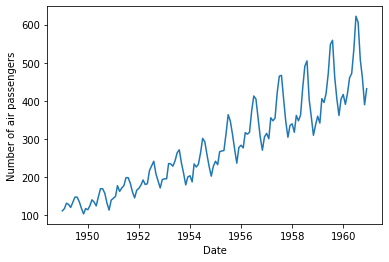

In [ ]:
plt.xlabel('Date')
plt.ylabel('Number of air passengers')
plt.plot(df)

In [ ]:
rolling_mean = df.rolling(window = 12).mean()
rolling_std = df.rolling(window = 12).std()

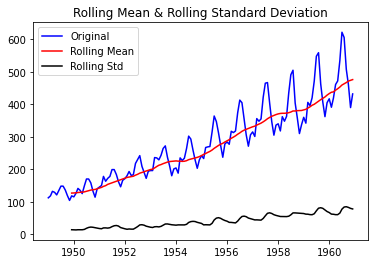

In [ ]:
plt.plot(df, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

You can find out that rolling mean and standard deviation increase with time. Thus, we can conclude that this time series data is not stationary.

In [ ]:
result = adfuller(df['Passengers'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: 0.8153688792060472
p-value: 0.991880243437641
Critical Values:
	1%: -3.4816817173418295
	5%: -2.8840418343195267
	10%: -2.578770059171598


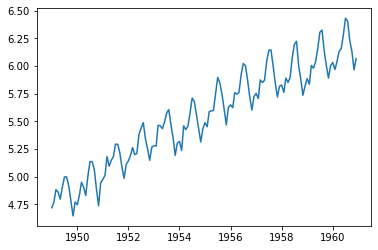

In [ ]:
# let's use log values from now
df_log = np.log(df)
plt.plot(df_log)
plt.show()

In [ ]:
# function to get stationary test statistics 
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['Passengers'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('# lags used: {}'.format(result[2]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

You can take log returns, calculate exponential decay and etc to make our data stationary. 

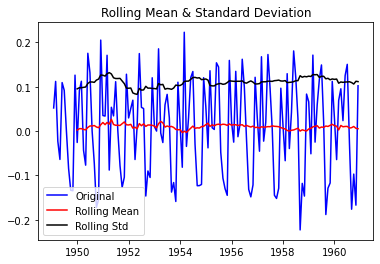

ADF Statistic: -2.7171305983881284
p-value: 0.0711205481508595
# lags used: 14
Critical Values:
	1%: -3.4825006939887997
	5%: -2.884397984161377
	10%: -2.578960197753906


In [ ]:
# Ex) Time shift
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)

### Plot ACF & PACF

We use ACF(Auto Correlation Function) & PACF(Partial Auto Correlation Function) plots to find proper value of P & Q for ARIMA. We need to find out when does the graph line goes below 0 for the first time. From ACF you get Q for MA and from PACF you can get P for AR.

In [ ]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(df_log_shift, nlags=20)
lag_pacf = pacf(df_log_shift, nlags=20, method='ols')

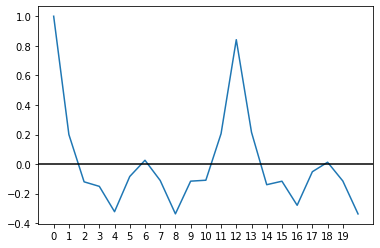

In [ ]:
plt.plot(lag_acf)
plt.axhline(y=0, color = 'black')
plt.xticks(ticks=list(range(20)))
plt.show()

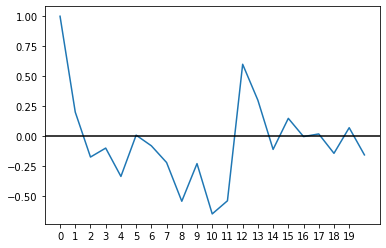

In [ ]:
plt.plot(lag_pacf)
plt.axhline(y=0, color = 'black')
plt.xticks(ticks=list(range(20)))
plt.show()

Now let's fit ARIMA model with AR of order 2, differencing of order 1 and MA of order 2

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df_log, order=(2,1,2))
results = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 128.890
Date:                Mon, 02 May 2022   AIC                           -247.780
Time:                        11:56:05   BIC                           -232.965
Sample:                    01-01-1949   HQIC                          -241.760
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2431      0.166      1.469      0.142      -0.081       0.568
ar.L2          0.2677      0.199      1.344      0.179      -0.123       0.658
ma.L1         -0.0867      0.118     -0.732      0.4

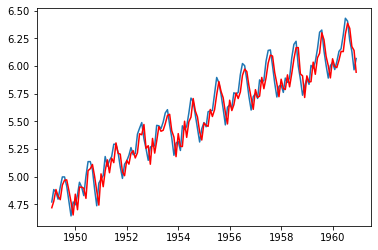

In [ ]:
plt.plot(df_log.iloc[1:])
plt.plot(results.fittedvalues.iloc[1:], color='red')
plt.show()